In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
from scipy import stats
import math

## What is t-score?
The t score is a ratio between the difference between two groups and the difference within the groups. **The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.** A t score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

**A large t-score tells you that the groups are different.**



**A small t-score tells you that the groups are similar.**

![image info](https://miro.medium.com/max/466/1*1ZUnA4eR5J2WEGhDVPDkEw.png)

where, Mx and My are the mean values of the two samples of male and female. <br>
Nx and Ny are the sample space of the two samples <br>
S is the standard deviation <br>

## What are T-Values and P-values?
How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. **Low p-values are good**; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

**If abs(t-statistic) <= critical value: Accept null hypothesis that the means are equal.**<br>
**If abs(t-statistic) > critical value: Reject the null hypothesis that the means are equal.**

We can also retrieve the cumulative probability of observing the absolute value of the t-statistic using the cumulative distribution function (CDF) of the t-distribution in order to calculate a p-value. The p-value can then be compared to a chosen significance level (alpha) such as 0.05 to determine if the null hypothesis can be rejected:

**If p > alpha: Accept null hypothesis that the means are equal.**<bR>
**If p <= alpha: Reject null hypothesis that the means are equal.**

### Assumptions

1. Both samples were drawn from a Gaussian distribution
2. the samples have the same variance, and the same size

Although there are corrections to the test if these assumptions do not hold

**There are two main versions of Student’s t-test:**

1. Independent Samples. The case where the two samples are unrelated.<br>
2. Dependent Samples. The case where the samples are related, such as repeated measures on the same population. Also called a paired test.

## Independent Samples

### Calculation

In [4]:
"""
t = observed difference between sample means / standard error of the difference between the means
or
t = (mean(X1) - mean(X2)) / sed

sed: standard error
Where se1 and se2 are the standard errors for the first and second datasets.

sed = sqrt(se1^2 + se2^2)

The standard error of a sample can be calculated as:
se = std / sqrt(n)

Where se is the standard error of the sample, 
std is the sample standard deviation, 
and n is the number of observations in the sample.

"""

'\nt = observed difference between sample means / standard error of the difference between the means\nor\nt = (mean(X1) - mean(X2)) / sed\n\nsed: standard error\nWhere se1 and se2 are the standard errors for the first and second datasets.\n\nsed = sqrt(se1^2 + se2^2)\n\nThe standard error of a sample can be calculated as:\nse = std / sqrt(n)\n\nWhere se is the standard error of the sample, \nstd is the sample standard deviation, \nand n is the number of observations in the sample.\n\n'

### Implementation

In [5]:
# # calculate means
# mean1, mean2 = mean(data1), mean(data2)


# # calculate sample standard deviations
# std1, std2 = std(data1, ddof=1), std(data2, ddof=1)


# # calculate standard errors
# n1, n2 = len(data1), len(data2)
# se1, se2 = std1/sqrt(n1), std2/sqrt(n2)


# #Alternately, we can use the sem() SciPy function to calculate the standard error directly.
# # calculate standard errors
# se1, se2 = sem(data1), sem(data2)


# #We can use the standard errors of the samples to calculate the “standard error on the difference between the samples“:
# # standard error on the difference between the samples
# sed = sqrt(se1**2.0 + se2**2.0)

# #We can now calculate the t statistic:
# t_stat = (mean1 - mean2) / sed

# #We can also calculate some other values to help interpret and present the statistic.
# #The number of degrees of freedom for the test is calculated as the sum of the observations in both samples, minus two.
# df = n1 + n2 - 2

# #The critical value can be calculated using the percent point function (PPF) for a given significance level, 
# #such as 0.05 (95% confidence).
# # calculate the critical value
# alpha = 0.05
# cv = t.ppf(1.0 - alpha, df)


# # calculate the p-value
# p = (1 - t.cdf(abs(t_stat), df)) * 2

# #Here, we assume a two-tailed distribution,
# #where the rejection of the null hypothesis could be interpreted
# #as the first mean is either smaller or larger than the second mean.

In [6]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = data1.mean(),data2.mean()
 # calculate standard errors
 se1, se2 = stats.sem(data1), stats.sem(data2)
 # standard error on the difference between the samples
 sed = np.sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = stats.t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p

### Worked Example

In this section we will calculate the t-test on some synthetic data samples.<br>

First, let’s generate two samples of 100 Gaussian random numbers with the same variance of 5 and differing means of 50 and 51 respectively.<br> We will expect the test to reject the null hypothesis and find a significant difference between the samples:

In [7]:
# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([38.49230652, 40.73586357, 42.97942062, 45.22297767, 47.46653472,
        49.71009177, 51.95364883, 54.19720588, 56.44076293, 58.68431998,
        60.92787703]),
 <BarContainer object of 10 artists>)

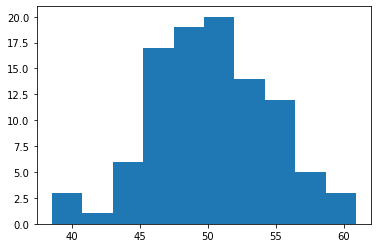

In [8]:
plt.hist(data1, bins=10)

In [9]:
data1.mean()

50.30291426037849

(array([ 1.,  4., 10.,  7., 23., 21., 19.,  9.,  3.,  3.]),
 array([38.82581118, 41.30739291, 43.78897465, 46.27055639, 48.75213812,
        51.23371986, 53.71530159, 56.19688333, 58.67846506, 61.1600468 ,
        63.64162853]),
 <BarContainer object of 10 artists>)

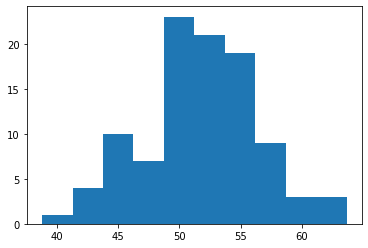

In [10]:
plt.hist(data2, bins=10)

In [11]:
data2.mean()

51.763973888101

**Lets test our function**

In [12]:
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)

In [13]:
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

t=-2.262, df=198, cv=1.653, p=0.025


In [14]:
# interpret via critical value
if abs(t_stat) <= cv:
 print('Accept null hypothesis that the means are equal.')
else:
 print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [15]:
# interpret via p-value
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
 print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.



The t-statistic and the p-value are then used to interpret the results of the test. We find that as we expect, there is sufficient evidence to reject the null hypothesis, finding that the sample means are likely different.

